In [14]:
from tensorflow.keras import models, layers

train_dir = './PetImages/train'    # train data
test_dir = './PetImages/test'    # test data

# model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

# compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create an ImageDataGenerator
# to prevent the overfitting
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode='binary'
)

# Training
history = model.fit_generator(
    train_generator, steps_per_epoch=100, epochs=10,
    validation_data=test_generator, validation_steps=5)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


<ipython-input-17-9c5170785b70>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
100/100 [==============================] - 28s 171ms/step - loss: 0.7858 - accuracy: 0.5355 - val_loss: 0.6924 - val_accuracy: 0.5100
Epoch 2/10
100/100 [==============================] - 19s 183ms/step - loss: 0.6765 - accuracy: 0.5910 - val_loss: 0.6820 - val_accuracy: 0.5900
Epoch 3/10
100/100 [==============================] - 18s 182ms/step - loss: 0.6229 - accuracy: 0.6560 - val_loss: 0.6382 - val_accuracy: 0.6700
Epoch 4/10
100/100 [==============================] - 22s 225ms/step - loss: 0.5793 - accuracy: 0.6970 - val_loss: 0.6709 - val_accuracy: 0.6400
Epoch 5/10
100/100 [==============================] - 17s 169ms/step - loss: 0.5885 - accuracy: 0.6860 - val_loss: 0.6331 - val_accuracy: 0.6600
Epoch 6/10
100/100 [==============================] - 12s 120ms/step - loss: 0.5472 - accuracy: 0.7205 - val_loss: 0.6352 - val_accuracy: 0.6700
Epoch 7/10
100/100 [==============================] - 12s 116ms/step - loss: 0.5413 - accuracy: 0.7335 - val_loss: 0.5437 - val_ac

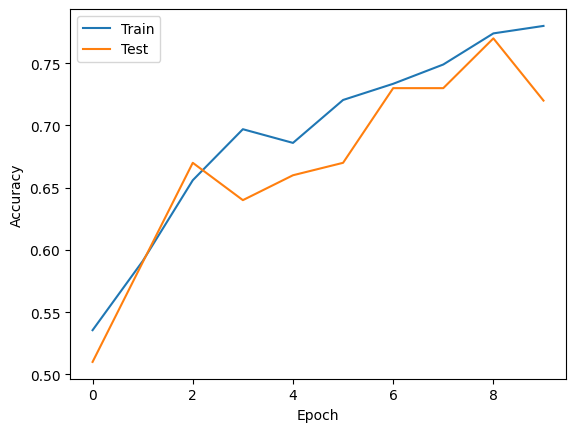

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()